In [80]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import seaborn as sns
import networkx as nx

from sklearn.neighbors import KernelDensity

from scipy.stats import ks_2samp

from graspy.plot import heatmap

from mgcpy.independence_tests.mgc.mgc import MGC

from load_data import pairs_from_list

from utils import estimate_block_assignment, to_distance_mtx, identity, sort_graph, binarize, pvalue, block_permute, \
get_null_test_stats, to_undirected

In [99]:
def fill_zero_with(arr, num=1/(500+1)):
    new_arr = arr.copy()
    new_arr[np.where(arr==0)] = num
    return new_arr

In [104]:
with open('../../results/mri_pvalues_case_1.pkl', 'rb') as f:
    pval1 = pickle.load(f)
    pval1 = np.array(pval1)[:, np.newaxis]
with open('../../results/mri_pvalues_case_2.pkl', 'rb') as f:
    pval2 = pickle.load(f)
    pval2 = np.array(pval2)#[:, np.newaxis]
with open('../../results/mri_pvalues_case_3.pkl', 'rb') as f:
    pval3 = pickle.load(f)
    pval3 = np.array(pval3)[:, np.newaxis]
pval1 = fill_zero_with(pval1)
pval3 = fill_zero_with(pval3)

In [101]:
plt.figure(figsize=(8, 6))

mpl.style.use('seaborn')
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
legend_size = 16
label_size = 18

<Figure size 576x432 with 0 Axes>

[]

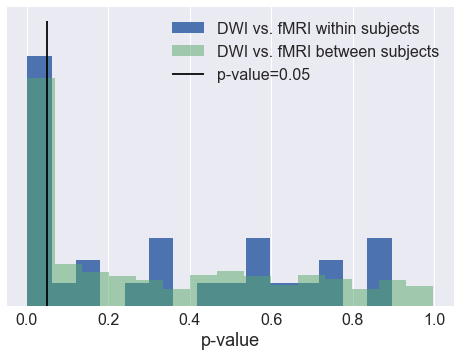

In [102]:
plt.hist(pval1, bins=15, density=True, label='DWI vs. fMRI within subjects')
plt.hist(pval3, bins=15, density=True, label='DWI vs. fMRI between subjects', alpha=0.5)

plt.xlabel('p-value', fontsize=label_size)
plt.yticks([])
plt.vlines(x=0.05, ymin=0, ymax=7, label='p-value=0.05')
plt.legend(prop={'size': legend_size})
plt.plot()

[]

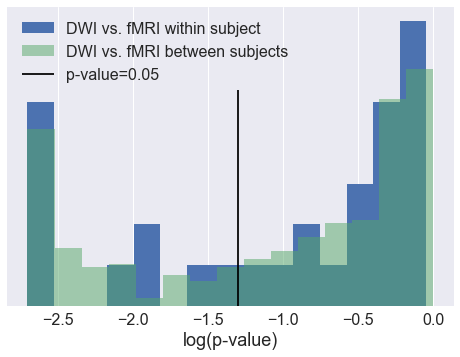

In [103]:
plt.hist(np.log10(pval1), bins=15, density=True,
         label='DWI vs. fMRI within subject')
plt.hist(np.log10(pval3), bins=15, density=True,
         label='DWI vs. fMRI between subjects', alpha=0.5)

plt.xlabel('log(p-value)', fontsize=label_size)
plt.vlines(x=np.log10(0.05), ymin=0, ymax=1, label='p-value=0.05')
plt.legend(prop={'size': legend_size})
plt.yticks([])
plt.plot()

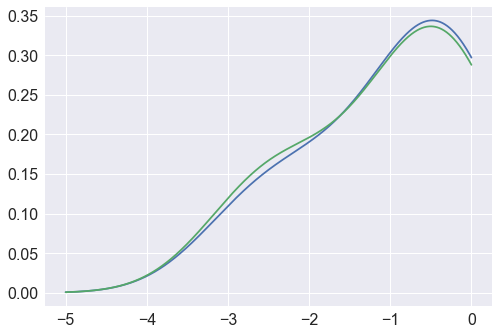

In [110]:
X_plot = np.linspace(-5, 0, 1000)[:, np.newaxis]

kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(np.log10(pval1))
log_dens = kde.score_samples(X_plot)
plt.plot(X_plot[:, 0], np.exp(log_dens))

kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(np.log10(pval3))
log_dens = kde.score_samples(X_plot)
plt.plot(X_plot[:, 0], np.exp(log_dens))

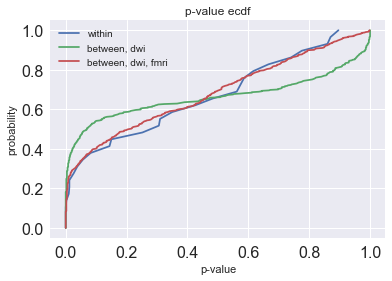

In [95]:
x = np.sort(pval1)
y = np.linspace(0, 1, x.size)
plt.plot(x, y, label='within')

x = np.sort(pval2)
y = np.linspace(0, 1, x.size)
plt.plot(x, y, label='between, dwi')

x = np.sort(pval3)
y = np.linspace(0, 1, x.size)
plt.plot(x, y, label='between, dwi, fmri')

plt.xlabel('p-value')
plt.ylabel('probability')
plt.title('p-value ecdf')
plt.legend()

In [97]:
ks_2samp(pval1, pval3)

Ks_2sampResult(statistic=0.08160919540229886, pvalue=0.9892399803403126)

In [94]:
ks_2samp(pval1, pval2)

Ks_2sampResult(statistic=0.18850574712643675, pvalue=0.24399817599874318)